<a href="https://colab.research.google.com/github/lifeisbeautifu1/TensorFlow/blob/master/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
import pandas as pd
circles = pd.DataFrame({'X0': X[:, 0], 'X1': X[:, 1], 'label':y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


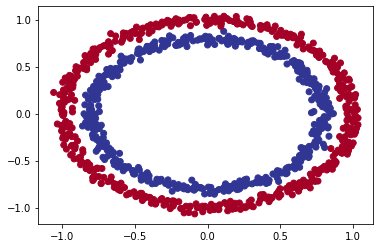

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling


In [ ]:
import tensorflow as tf

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["Accuracy"])


# 3. Fit the model
model_1.fit(X, y, epochs=5)



Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 4.2979 - Accuracy: 0.4670
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - Accuracy: 0.4400
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - Accuracy: 0.4310
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - Accuracy: 0.4270
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - Accuracy: 0.4240


In [ ]:
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6932 - Accuracy: 0.4830


[0.69315105676651, 0.4830000102519989]

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])


# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [ ]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314204216003, 0.5]

## Improving our model



In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print('doing multiclass classification')
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print('doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  

313/313 [==============================] - 1s 2ms/step
doing binary classification


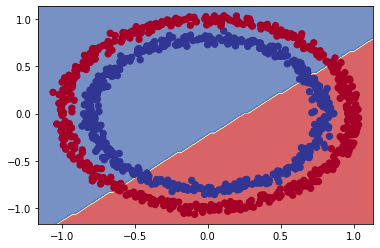

In [ ]:
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [ ]:
tf.random.set_seed(42)

X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

model_3.fit(X_reg_train, y_reg_train, epochs=100, verbose=0)

ValueError: ignored

In [ ]:
tf.random.set_seed(42)


# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(1, )),
    tf.keras.layers.Dense(10, input_shape=(1, )),
    tf.keras.layers.Dense(1, input_shape=(1, )),
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# 3. Fit the model
model_4.fit(X_reg_train, y_reg_train, epochs=100, verbose=0)

In [ ]:
model_4.evaluate(X_reg_test, y_reg_test)

2/2 [==============================] - 0s 6ms/step - loss: 57.8926 - mae: 57.8926


[57.892616271972656, 57.892616271972656]

2/2 [==============================] - 0s 5ms/step


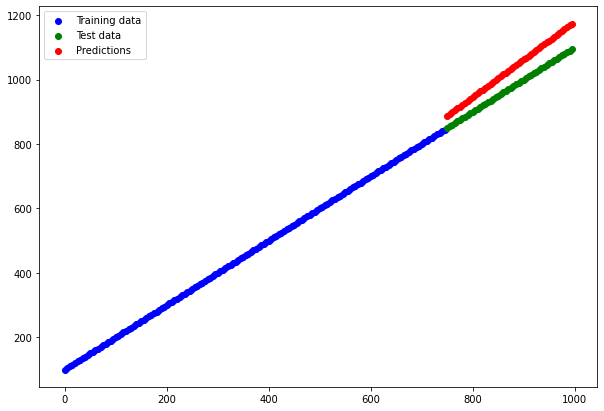

In [ ]:
y_reg_preds = model_4.predict(X_reg_test)

plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

In [ ]:
tf.random.set_seed(42)


# 1. Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
])

# 2. Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


313/313 [==============================] - 0s 1ms/step
doing binary classification


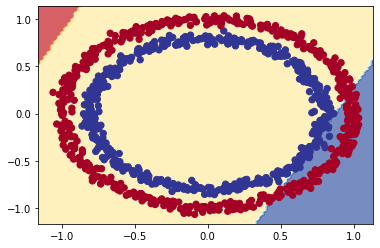

In [ ]:
plot_decision_boundary(model=model_5, X=X, y=y)

In [ ]:
tf.random.set_seed(42)


# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),
])

# 2. Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_6.fit(X, y, epochs=100, verbose=0)

313/313 [==============================] - 0s 1ms/step
doing binary classification


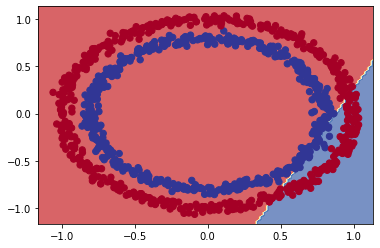

In [ ]:
plot_decision_boundary(model=model_6, X=X, y=y)

In [ ]:
tf.random.set_seed(42)


# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_7.fit(X, y, epochs=250, verbose=0)

313/313 [==============================] - 0s 1ms/step
doing binary classification


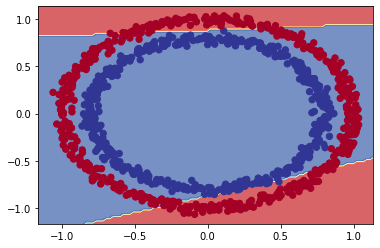

In [ ]:
plot_decision_boundary(model=model_7, X=X, y=y)

In [ ]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

In [ ]:
tf.random.set_seed(42)


# 1. Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

# 2. Compile the model
model_8.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_8.fit(X, y, epochs=100, verbose=0)

313/313 [==============================] - 0s 1ms/step
doing binary classification


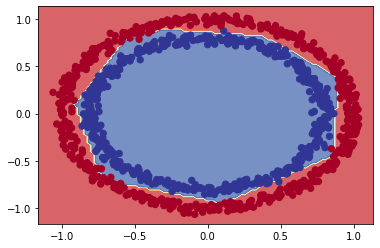

In [ ]:
plot_decision_boundary(model=model_8, X=X, y=y)

In [ ]:
model_8.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.9910


[0.29480040073394775, 0.9909999966621399]

In [ ]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

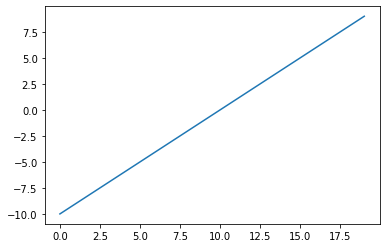

In [ ]:
plt.plot(A)

In [ ]:
def sigmoid(x):
  return 1 / (1 + tf.math.exp(-x))

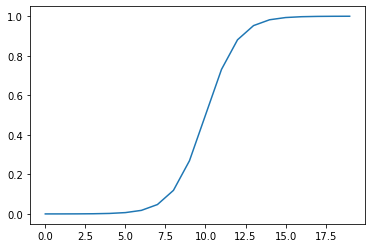

In [ ]:
plt.plot(sigmoid(A));

In [ ]:
def relu(x):
  return tf.maximum(x, 0)

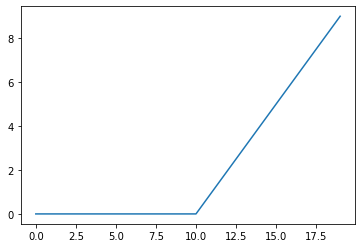

In [ ]:
plt.plot(relu(A))

## Improving

In [ ]:
len(X)

1000

In [ ]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
tf.random.set_seed(42)

# 1. Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

# 2. Compile the model
model_9.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

# 3.Fit the model
history = model_9.fit(X_test, y_test, epochs=100, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 1.0000


[0.05135704204440117, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


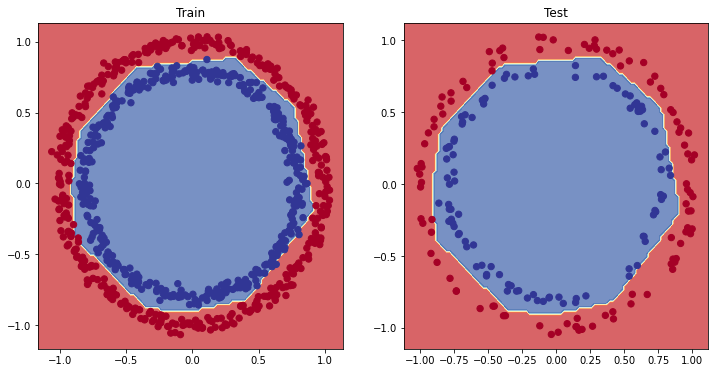

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_9, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_9, X=X_test, y=y_test)
plt.show()

In [ ]:
model_9.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 4)                 12        
                                                                 
 dense_81 (Dense)            (None, 4)                 20        
                                                                 
 dense_82 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history.history

{'loss': [0.6779382824897766,
  0.6717190742492676,
  0.6671366095542908,
  0.6635475158691406,
  0.6586717367172241,
  0.654661238193512,
  0.6508530378341675,
  0.6454282999038696,
  0.6412967443466187,
  0.6358330249786377,
  0.6378952264785767,
  0.6278150677680969,
  0.6229276657104492,
  0.6191527247428894,
  0.6136539578437805,
  0.6094729900360107,
  0.6074938774108887,
  0.6010388731956482,
  0.6006661057472229,
  0.593800961971283,
  0.5888366103172302,
  0.584353506565094,
  0.5821734070777893,
  0.578327476978302,
  0.5741442441940308,
  0.5701763033866882,
  0.5667218565940857,
  0.5636032819747925,
  0.5582222938537598,
  0.5526623725891113,
  0.5450146198272705,
  0.53824383020401,
  0.5300590395927429,
  0.5223787426948547,
  0.5165600776672363,
  0.5118156671524048,
  0.5012167096138,
  0.4897700846195221,
  0.47202029824256897,
  0.4575982689857483,
  0.443648099899292,
  0.43411022424697876,
  0.41420137882232666,
  0.40151259303092957,
  0.3891935646533966,
  0.3746

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.677938,0.530
1,0.671719,0.570
2,0.667137,0.585
3,0.663548,0.600
4,0.658672,0.590
...,...,...
95,0.058226,1.000
96,0.056110,1.000
97,0.058277,1.000
98,0.053672,1.000


Text(0.5, 1.0, 'Model_9 loss curves')

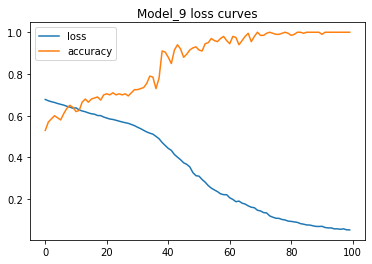

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model_9 loss curves")

## Find the best learning rate


In [ ]:
# Set random seed
tf.random.set_seed(42)


# 1. Create a model (same as model_9)
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

# 2. Compile the model
model_10.compile(loss=tf.keras.losses.binary_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# 3. Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/ 20))

# 4. Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=100, callbacks=lr_scheduler)

Epoch 1/100
25/25 [==============================] - 2s 4ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 11ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 6ms/step - loss

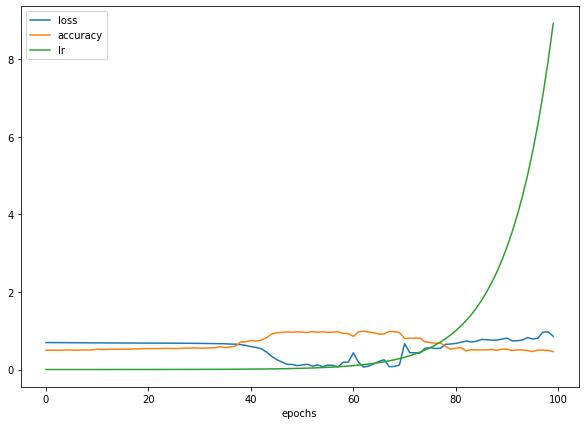

In [ ]:
pd.DataFrame(history_10.history).plot(figsize=(10, 7), xlabel="epochs")

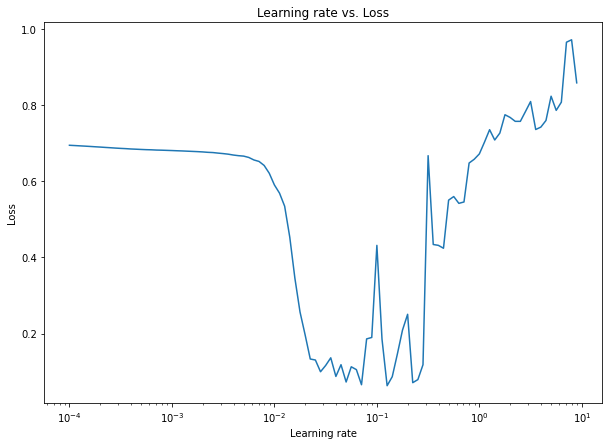

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_10.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss");

In [ ]:
tf.random.set_seed(42)

# 1. Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

# 2. Compile the model
model_11.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.02),
                metrics=["accuracy"])

# 3.Fit the model
history_11 = model_11.fit(X_train, y_train, epochs=20, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model_11.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9900


[0.0574018768966198, 0.9900000095367432]

313/313 [==============================] - 1s 3ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


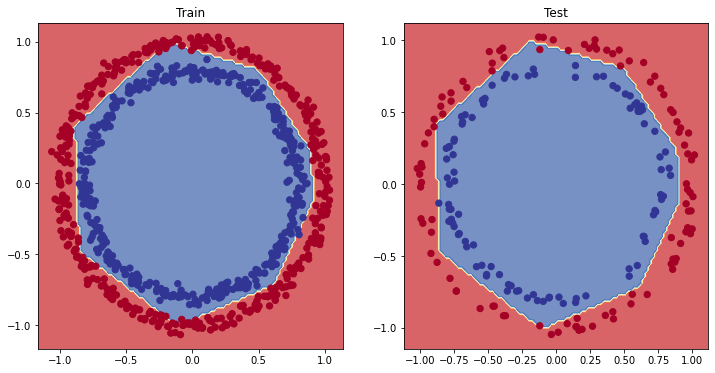

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_11, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_11, X=X_test, y=y_test)
plt.show();

## More classification evaluation methods
* Accuracy
* Precision
* Confusion Metrix
* Recall
* F1-score
* Classificaion report

In [ ]:
loss, accuracy = model_11.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy) * 100:.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test set: 0.0574018768966198
Model accuracy on the test set: 99.00%


In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = model_11.predict(X_test)

# confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 3ms/step


In [ ]:
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

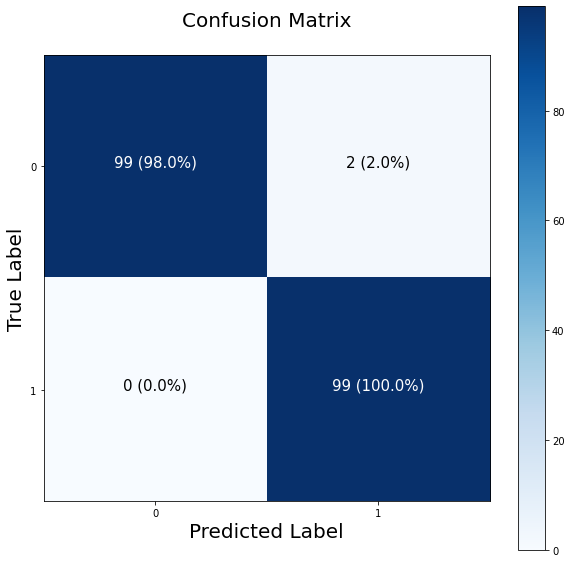

In [ ]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-ais labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)


# Working with a larger example (multiclass classification)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}")
print(f"Training label:\n{train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of the single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

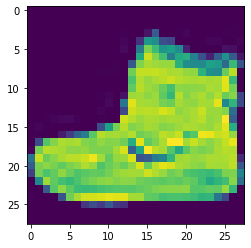

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

Text(0.5, 1.0, 'Ankle boot')

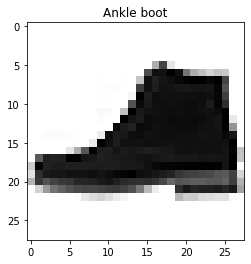

In [ ]:
plt.imshow(train_data[42], cmap=plt.cm.binary)
plt.title(class_names[train_labels[42]])

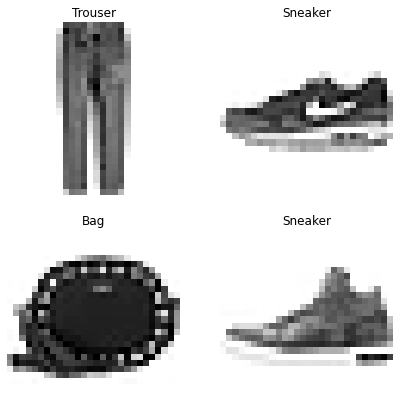

In [ ]:
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_12 = tf.keras.Sequential([
    # 28 * 28 -> 784
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
])

# 2. Compile the model
model_12.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# 3. Fit the model
non_norm_history = model_12.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1627 - accuracy: 0.1629 - val_loss: 1.7874 - val_accuracy: 0.2104
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7033 - accuracy: 0.2535 - val_loss: 1.6427 - val_accuracy: 0.2812
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6271 - accuracy: 0.2836 - val_loss: 1.6482 - val_accuracy: 0.2998
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6038 - accuracy: 0.2894 - val_loss: 1.5994 - val_accuracy: 0.2955
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5967 - accuracy: 0.2955 - val_loss: 1.5777 - val_accuracy: 0.3137
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5882 - accuracy: 0.3018 - val_loss: 1.5767 - val_accuracy: 0.3054
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5809 - accuracy: 0.3118 - val_loss: 1.5741 - val_accuracy:

In [ ]:
model_12.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_119 (Dense)           (None, 4)                 3140      
                                                                 
 dense_120 (Dense)           (None, 4)                 20        
                                                                 
 dense_121 (Dense)           (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_data.min(), train_data.max()

(0, 255)

In [ ]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0


train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_13 = tf.keras.Sequential([
    # 28 * 28 -> 784
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
])

# 2. Compile the model
model_13.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# 3. Fit the model
norm_history = model_13.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

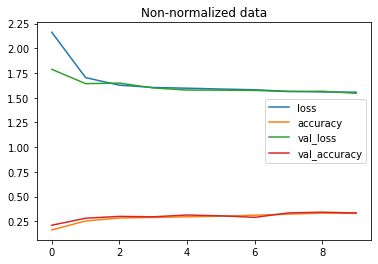

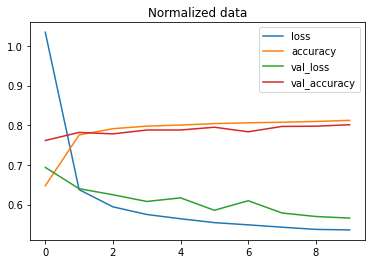

In [ ]:
import pandas as pd

pd.DataFrame(non_norm_history.history).plot(title='Non-normalized data')

pd.DataFrame(norm_history.history).plot(title="Normalized data")

## Find the ideal learning rate

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_14 = tf.keras.Sequential([
    # 28 * 28 -> 784
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
])

# 2. Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# 3. Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch / 20))

# 4. Fit the model
find_lr_history = model_14.fit(train_data_norm, train_labels, epochs=40, validation_data=(test_data_norm, test_labels), callbacks=lr_scheduler)

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5

Text(0.5, 1.0, 'Finding the ideal learning rate')

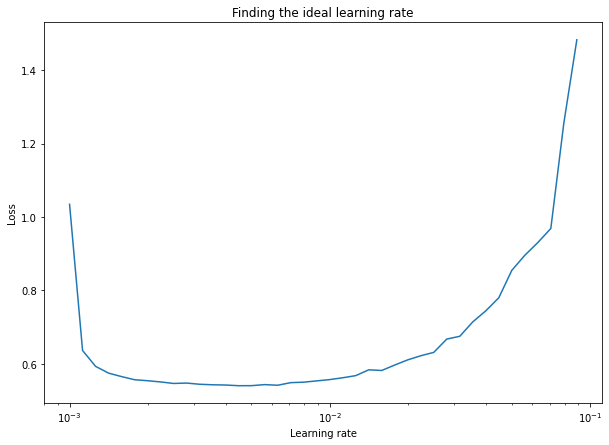

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt 

lrs = 1e-3 * (10 ** (tf.range(40)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")



In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_15 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
])

# 2. Compile the model
model_15.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

# 3. Fit the model
find_lr_history = model_15.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 7s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy: 0.7836
Ep

## Evaluating


In [ ]:
import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-ais labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)


In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
y_probs = model_15.predict(test_data_norm)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([2.6757491e-10, 8.3620973e-15, 4.8127058e-05, 3.4011570e-08,
        1.2373690e-04, 2.7335274e-01, 3.3961447e-07, 8.8270023e-02,
        6.1673550e-03, 6.3203758e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[801,  11,  27,  81,   7,   1,  62,   0,  10,   0],
       [  2, 940,   2,  36,   7,   0,  13,   0,   0,   0],
       [ 34,   2, 662,  14, 166,   1, 108,   0,  13,   0],
       [ 67,  12,  12, 836,  33,   0,  28,   0,  12,   0],
       [  3,   1, 119,  44, 730,   0,  92,   0,   9,   2],
       [  0,   0,   0,   0,   0, 918,   0,  51,   7,  24],
       [205,   9, 171,  58, 141,   3, 397,   0,  16,   0],
       [  0,   0,   0,   0,   0,  44,   0, 921,   0,  35],
       [  3,   2,  34,  23,  10,  13,   7,   5, 901,   2],
       [  0,   0,   2,   0,   4,  37,   0,  47,   2, 908]])

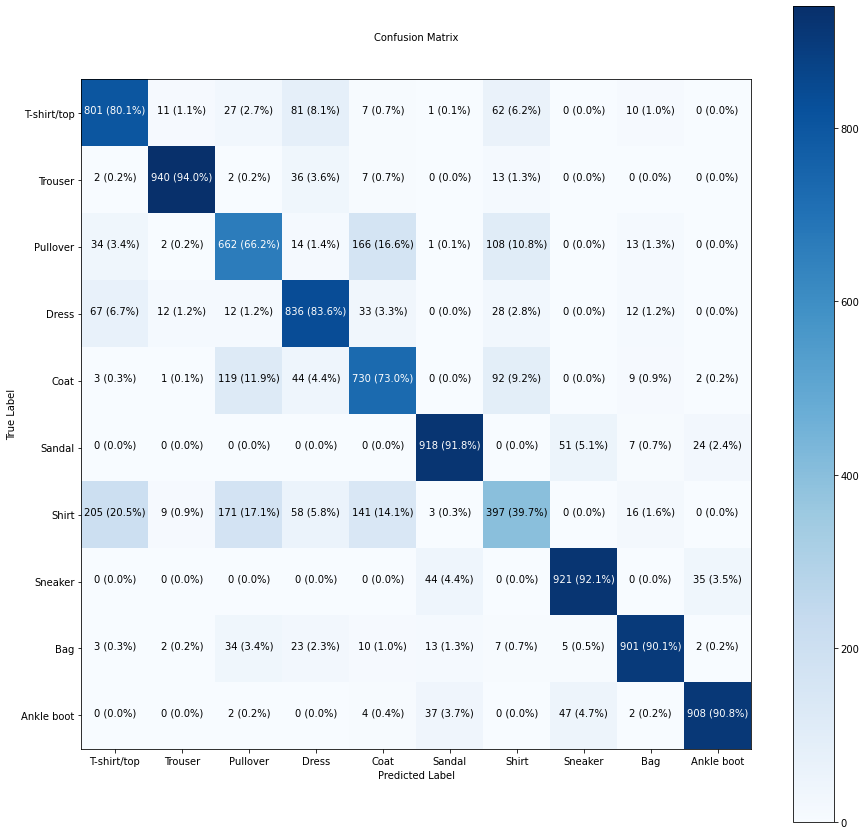

In [ ]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  i = random.randint(0, len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'
  
  plt.xlabel("Pred: {} {:2.0f}% (True: {}".format(pred_label,
                                                  100*tf.reduce_max(pred_probs),
                                                  true_label),
                                                  color=color)

1/1 [==============================] - 0s 20ms/step


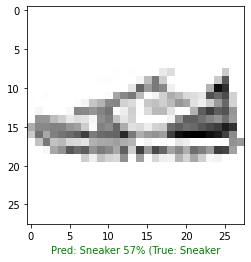

In [ ]:
plot_random_image(model=model_15,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

## Patterns?

In [ ]:
model_15.layers

In [ ]:
# Extract a particular layer
model_15.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_15.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.38585958, -0.01683232, -0.48614585, -0.53817415],
        [ 0.09176347, -0.07343117, -0.27991334,  0.04825679],
        [ 0.43908086,  0.46483982, -0.6423494 , -0.4443902 ],
        ...,
        [-0.2540554 ,  0.5379419 , -0.15410887,  0.15027744],
        [-0.23082425,  0.45492074,  0.08331519, -0.37904847],
        [ 0.15038307,  0.13788234, -0.14806944, -0.01065999]],
       dtype=float32), (784, 4))

In [ ]:
model_15.summary()

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_140 (Dense)           (None, 4)                 3140      
                                                                 
 dense_141 (Dense)           (None, 4)                 20        
                                                                 
 dense_142 (Dense)           (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
biases, biases.shape

(array([-0.07772568,  0.08738951, -0.3689589 ,  0.7236027 ], dtype=float32),
 (4,))

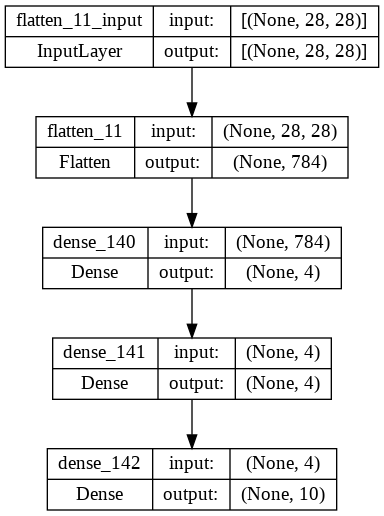

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_15, show_shapes=True)